In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("/content/bmi.csv")

In [3]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
data.shape

(500, 4)

In [5]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [30]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])

In [10]:
data.head()

,Gender,Height,Weight,Index,gender
0,1,174,96,4,1
1,1,189,87,2,1
2,0,185,110,4,0
3,0,195,104,3,0
4,1,149,61,3,1


In [11]:
bins = (-1, 0, 1, 2, 3, 4, 5)
health = ['malnourished', 'underweight', 'fit', 'slightly overweight', 'overweight', 'extremly overweight']
data['Index'] = pd.cut(data['Index'], bins = bins, labels = health)

In [12]:
data['Index']

0               overweight
1                      fit
2               overweight
3      slightly overweight
4      slightly overweight
              ...         
495    extremly overweight
496             overweight
497    extremly overweight
498    extremly overweight
499    extremly overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): ['malnourished' < 'underweight' < 'fit' < 'slightly overweight' < 'overweight' <
                         'extremly overweight']

In [13]:
data['Index'].value_counts()

extremly overweight    198
overweight             130
fit                     69
slightly overweight     68
underweight             22
malnourished            13
Name: Index, dtype: int64

In [14]:
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

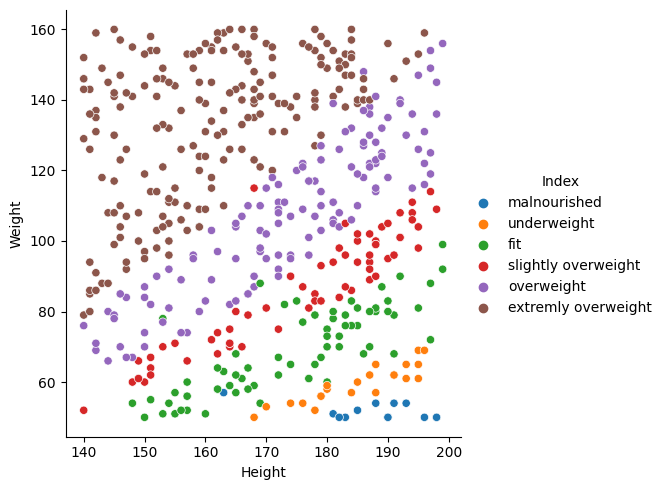

In [18]:
sns.relplot(x='Height', y='Weight', hue="Index", data=data)

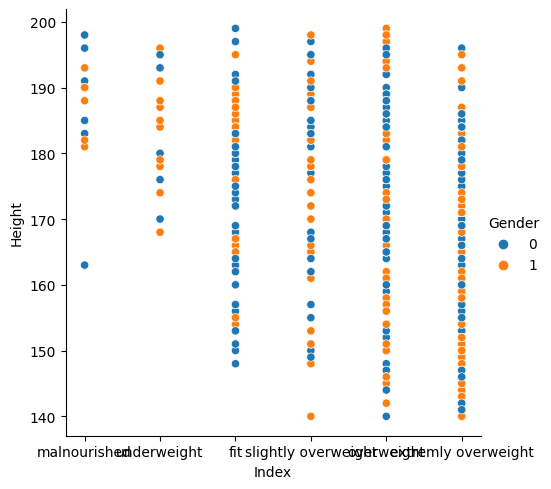

In [20]:
sns.relplot(x='Index', y='Height', hue="Gender", data=data)

In [21]:
X = data.drop('Index', axis=1)
y = data['Index']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
S = StandardScaler()
X_train = S.fit_transform(X_train)
X_test = S.fit_transform(X_test)

In [24]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [25]:
print(classification_report(y_test, pred))

                     precision    recall  f1-score   support

extremly overweight       0.88      0.97      0.92        36
                fit       0.62      0.80      0.70        10
       malnourished       0.00      0.00      0.00         3
         overweight       0.90      0.84      0.87        32
slightly overweight       0.85      0.73      0.79        15
        underweight       0.75      0.75      0.75         4

           accuracy                           0.84       100
          macro avg       0.66      0.68      0.67       100
       weighted avg       0.82      0.84      0.83       100



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print(confusion_matrix(y_test, pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  2  0  0  0  1]
 [ 5  0  0 27  0  0]
 [ 0  2  0  2 11  0]
 [ 0  1  0  0  0  3]]


In [35]:
print(accuracy_score(y_test, pred))

0.84


In [43]:
a = [[0, 185, 153, 0]]
a = S.transform(a)
b = clf.predict(a)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
b

array(['extremly overweight'], dtype=object)

In [40]:
data

,Gender,Height,Weight,Index,gender
0,1,174,96,overweight,1
1,1,189,87,fit,1
2,0,185,110,overweight,0
3,0,195,104,slightly overweight,0
4,1,149,61,slightly overweight,1
...,...,...,...,...,...
495,0,150,153,extremly overweight,0
496,0,184,121,overweight,0
497,0,141,136,extremly overweight,0
498,1,150,95,extremly overweight,1
